The libraries 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

Importing the data


In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
final_test=pd.read_csv('test.csv')
final_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
final_test.shape

(418, 11)

Data preprocessing 


In [6]:
#let's check the nulls 
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
#age,cabin ,and Embarked contain nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

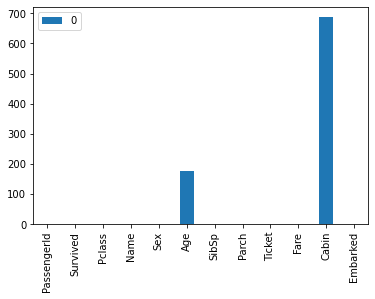

In [8]:
df.isnull().sum().to_frame().plot(kind='bar')

In [13]:
null_value = df.isnull().sum().to_frame()

In [16]:
null_value

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<AxesSubplot:>

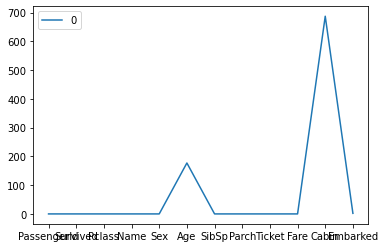

In [28]:
sns.lineplot(data = null_value)

In [19]:
df.Age=df.Age.fillna(df.Age.mean())

In [20]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [21]:
df.Embarked.isnull().sum()

2

In [22]:
df.Embarked=df.Embarked.fillna(method='ffill')

In [23]:
df.Embarked.isnull().sum()

0

In [24]:
df.Cabin.isnull().sum()/df.shape[0]    #70% record in Cabin column is null , so I will drop that column :(

0.7710437710437711

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df=df.drop(['PassengerId','Name','Cabin'],axis=1)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [29]:
gender=pd.get_dummies(df.Sex).drop('male',axis=1)

In [30]:
gender.head()

,female
0,0
1,1
2,1
3,1
4,0


In [31]:
gender=gender.rename(columns={'female':'Gender'})

In [32]:
embarked=pd.get_dummies(df.Embarked)
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [33]:
df=pd.concat([df,gender,embarked],axis=1)

In [34]:
df=df.drop(['Sex','Ticket','Embarked'],axis=1)

In [35]:
df.Age=df.Age.round()

In [36]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1


In [47]:
#So,let's go ahead for EDA ;)

Exploratory data analysis 


<AxesSubplot:xlabel='Survived', ylabel='count'>

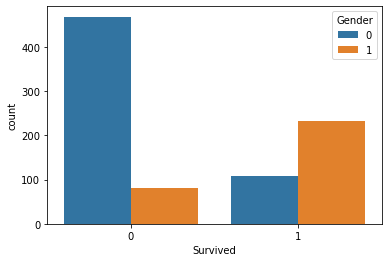

In [48]:
sns.countplot(x='Survived',data=df,hue='Gender')

In [49]:
#1 refers to female 

<AxesSubplot:xlabel='Age', ylabel='Count'>

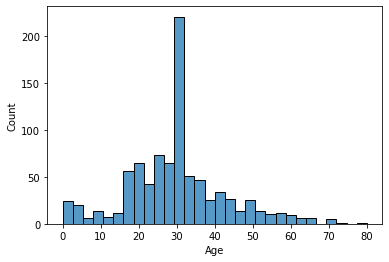

In [50]:
sns.histplot(x='Age',data=df)

Building the model

In [51]:
from sklearn.linear_model import LogisticRegression 

In [52]:
model=LogisticRegression(max_iter=6000)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X=df.drop('Survived',axis=1)
y=df.Survived

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [56]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=6000)

In [57]:
y_pred=model.predict(X_test)

In [58]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0])

In [59]:
y_test.values

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0])

Evaluate the model

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test,y_pred)

array([[102,  12],
       [ 21,  44]])

In [62]:
from sklearn.metrics import classification_report 

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.79      0.68      0.73        65

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



The submission 

In [64]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
test.Age=test.Age.fillna(test.Age.mean())

In [67]:
test.Age.isnull().sum()

0

In [68]:
gender=pd.get_dummies(test.Sex)

In [69]:
gender=gender.drop('male',axis=1)

In [70]:
gender=gender.rename(columns={'female':'Gender'})

In [71]:
Embarked=pd.get_dummies(test.Embarked)

In [72]:
test=pd.concat([gender,Embarked,test],axis=1)

In [73]:
test=test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [74]:
test.isnull().sum()

Gender    0
C         0
Q         0
S         0
Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [75]:
test.Fare=test.Fare.fillna(method='ffill')

In [76]:
test.isnull().any()

Gender    False
C         False
Q         False
S         False
Pclass    False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool

In [77]:
test.head()

,Gender,C,Q,S,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,3,34.5,0,0,7.8292
1,1,0,0,1,3,47.0,1,0,7.0000
2,0,0,1,0,2,62.0,0,0,9.6875
3,0,0,0,1,3,27.0,0,0,8.6625
4,1,0,0,1,3,22.0,1,1,12.2875


In [78]:
y_sub=model.predict(test)

In [79]:
y_sub

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [80]:
y_sub=pd.Series(y_sub,name='Survived')

In [81]:
y_sub

0      1
1      1
2      1
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: Survived, Length: 418, dtype: int64

In [82]:
sub=pd.concat([final_test.PassengerId,y_sub],axis=1)

In [83]:
sub.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
